[youtube](https://youtu.be/-RY67sJvL3A)
[github](https://github.com/SungchulLee/financial_math/tree/master/candlestick_chart)
[ppt](https://github.com/SungchulLee/financial_math/blob/master/%E1%84%8F%E1%85%A6%E1%86%AB%E1%84%83%E1%85%B3%E1%86%AF%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%A8%20%E1%84%8E%E1%85%A1%E1%84%90%E1%85%B3.pptx)
[How to install mpl_finance (deprecated matplotlib.finance module)](https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance)

```
pip install mpl_finance
```
or
```
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
```

In [1]:
import yfinance as yf
dax = yf.Ticker('^GDAXI') # German DAX index
data = dax.history(start="2014-05-01", end="2014-06-30")
data = data.drop(columns=['Dividends', 'Stock Splits'])
print(data.head(2))

               Open     High      Low    Close    Volume
Date                                                    
2014-04-30  9576.93  9618.98  9561.06  9603.23  90290900
2014-05-02  9611.79  9627.38  9533.30  9556.02  88062300


In [2]:
import matplotlib.dates as mdates
data_ohlc = data.copy()
data_ohlc = data_ohlc.reset_index()
print(data_ohlc.head(2))
data_ohlc['Date'] = [mdates.date2num(d) for d in data_ohlc['Date']]
print(data_ohlc.head(2))
data_ohlc_to_feed = data_ohlc.values
print(data_ohlc_to_feed[:2])

        Date     Open     High      Low    Close    Volume
0 2014-04-30  9576.93  9618.98  9561.06  9603.23  90290900
1 2014-05-02  9611.79  9627.38  9533.30  9556.02  88062300
       Date     Open     High      Low    Close    Volume
0  735353.0  9576.93  9618.98  9561.06  9603.23  90290900
1  735355.0  9611.79  9627.38  9533.30  9556.02  88062300
[[7.35353e+05 9.57693e+03 9.61898e+03 9.56106e+03 9.60323e+03 9.02909e+07]
 [7.35355e+05 9.61179e+03 9.62738e+03 9.53330e+03 9.55602e+03 8.80623e+07]]


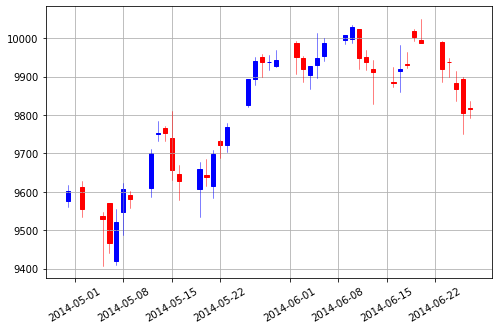

In [9]:
%matplotlib inline
import mpl_finance as mpf
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters as converter; converter()
fig, ax = plt.subplots(figsize=(8, 5))
mpf.candlestick_ohlc(ax, data_ohlc_to_feed, width=0.6, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date() # dates on the x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=30) # dates on the x-axis (rotation=30)
plt.show()

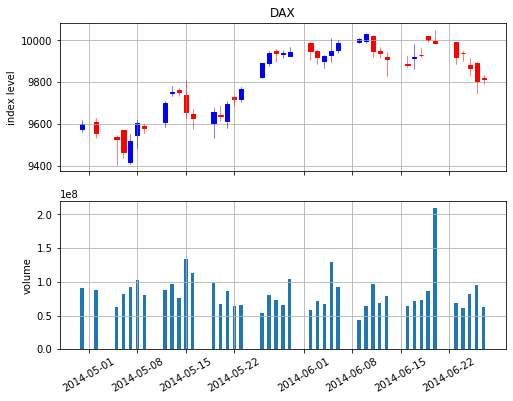

In [40]:
%matplotlib inline
import mpl_finance as mpf
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters as converter; converter()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))
mpf.candlestick_ohlc(ax1, data_ohlc_to_feed, width=0.6, colorup='b', colordown='r')
ax1.set_title('DAX')
ax1.set_ylabel('index level')
ax1.grid(True)
ax1.xaxis_date()
ax2.bar(data.index, data.Volume, width=0.5)
ax2.set_ylabel('volume')
ax2.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()